A1.3 Regresión Lineal Múltiple

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

1. Se despliegan los primeros 15 datos del archivo NASA.csv a través de la función .head(15) de la librería pandas.

In [3]:
data = pd.read_csv("A1.3 NASA.csv")
print(data.head(15))

    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         500     0.0    0.3048       55.5  0.002831  

2. Se realiza la separación de datos. Se utiliza la función sample() en el objeto DataFrame data con frac=1 para randomizar los datos, y se almacena la información en dataRand. Después, se calcula el tamaño que deba tener los datos train usando un ratio del 70% y el tamaño actual de registros en data. Después, se dividen en dos partes y se almacenan los datos de entrenamiento en train y el resto para prueba en test. 

In [4]:
dataRand = data.sample(frac=1)
ratio = .70
total_rows = dataRand.shape[0]
train_size = int(total_rows*ratio)

train = dataRand[0:train_size]
test = dataRand[train_size:]

print("Dimensiones originales de data: ", data.shape)
print("Dimensiones de train: ", train.shape)
print("Dimensiones de test: ", test.shape)

Dimensiones originales de data:  (1503, 6)
Dimensiones de train:  (1052, 6)
Dimensiones de test:  (451, 6)


3. Creación de modelo de regresión lineal múltiple. El resumen se obtiene utilizando la función summary() sobre el objeto sm que utiliza Ordinary Linear Regression. Después, se imprimen directamente los valores p usando el atributo .pvalues, dado a que son demasiado pequeños para conocer sus valores exactos en el resumen.

In [5]:
X_train = train[["frecuencia","angulo","longitud","velocidad","espesor"]]
Y_train = train["presion"]

X_test = test[["frecuencia","angulo","longitud","velocidad","espesor"]]
Y_test = test["presion"]

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(Y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     230.2
Date:                Wed, 12 Feb 2025   Prob (F-statistic):          9.54e-166
Time:                        19:20:46   Log-Likelihood:                -3145.2
No. Observations:                1052   AIC:                             6302.
Df Residuals:                    1046   BIC:                             6332.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.3330      0.653    202.531      0.0

In [ ]:
print("P-values:")
print(model_sm.pvalues)
pList = list(model_sm.pvalues)

# Se ordenan para comprender mejor sus magnitudes, la lista va de menor a mayor.
pList.sort()
print("\n",pList)

P-values:
const          0.000000e+00
frecuencia    1.456704e-113
angulo         4.065019e-17
longitud       6.082125e-62
velocidad      8.592160e-25
espesor        6.633865e-18
dtype: float64

 [0.0, 1.4567044379851176e-113, 6.082125046733137e-62, 8.592160301336146e-25, 6.633865473741176e-18, 4.0650185367080943e-17]


4. Se determina la variable significativa del model usando los valores de la prueba t de cada predictor, su valor p, los valores críticos y los rangos de confianza.

In [7]:
print("""
    De acuerdo a los datos obtenidos de nuestro modelo, se puede determinar que todas las variables son significativas (frecuencia, angulo, longitud, velocidad y espesor). 
    Todos los coeficientes tienen valores para su t-test significativos ya que son mayores que 1.962 o menores que -1.962 (1.962 es el valor crítico para un modelo con más
    de 1000 grados de libertad), así como los valores p correspondientes a cada uno dado a que son menores a 0.05. Lo anterior indica que los predictores están sigificativamente
    correlacionados con la variable presión, ya sea con una relación positiva (velocidad) o negativa (frecuencia, angulo, longuitud y espesor) con diferentes niveles de impacto.
      
    No obstante, se puede determinar que la frecuencia tiene un mayor grado de certitud a diferencia de otras variables, ya que cuenta con un intervalo de confianza estrecho.
""")


    De acuerdo a los datos obtenidos de nuestro modelo, se puede determinar que todas las variables son significativas (frecuencia, angulo, longitud, velocidad y espesor). 
    Todos los coeficientes tienen valores para su t-test significativos ya que son mayores que 1.962 o menores que -1.962 (1.962 es el valor crítico para un modelo con más
    de 1000 grados de libertad), así como los valores p correspondientes a cada uno dado a que son menores a 0.05. Lo anterior indica que los predictores están sigificativamente
    correlacionados con la variable presión, ya sea con una relación positiva (velocidad) o negativa (frecuencia, angulo, longuitud y espesor) con diferentes niveles de impacto.
      
    No obstante, se puede determinar que la frecuencia tiene un mayor grado de certitud a diferencia de otras variables, ya que cuenta con un intervalo de confianza estrecho.



5. Cálculo del RSE y el R^2 usando los datos de entrenamiento y los de prueba.

In [19]:
from sklearn.metrics import r2_score

X_test_sm = sm.add_constant(X_test)

predictions = model_sm.predict(X_test_sm)

n = len(Y_test)
p = X_test_sm.shape[1]

RSE = np.sqrt( np.sum((Y_test - predictions)**2) / (n - p - 1) )
print("RSE: ", RSE,"\n")

meanComparison = np.mean(Y_test)
print("Mean of Y:", meanComparison)
print("Percentage: ", RSE/meanComparison * 100,"\n")

r2 = r2_score(Y_test, predictions)
print("R^2: ", r2)

RSE:  4.818088834130302 

Mean of Y: 125.19641019955654
Percentage:  3.8484241093259146 

R^2:  0.4914743772436204


6. Visualización de resultados a través de una gráfica de dispersión de los valores reales contra los predecidos. Se utilizan los datos obtenidos del anterior paso para mostrar hasta que punto es capaz nuestro modelo de acercarse a los valores reales, de ser ese el caso, tenderían a formar una línea recta de 45°.

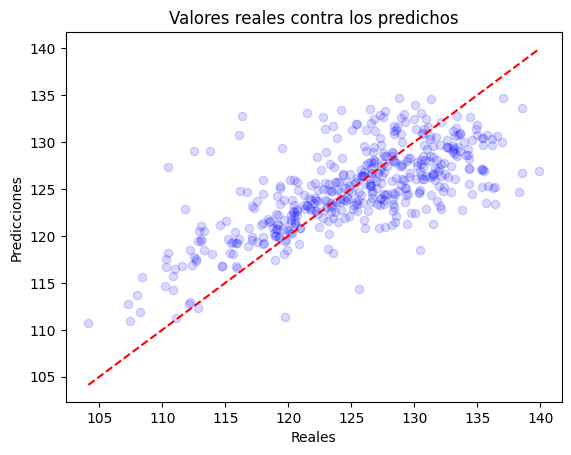

In [16]:
plt.scatter(Y_test, predictions, color="blue", label="Datos actuales",alpha=0.15)

max_val = max(max(Y_test), max(predictions))
min_val = min(min(Y_test), min(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Linea de 45°')

plt.ylabel("Predicciones")
plt.xlabel("Reales")
plt.title("Valores reales contra los predichos")
plt.show()

A través de la anterior gráfica, se puede determinar que los valores son más parecidos entre 117 y 133, pero sigue habiendo demasiada variación de los datos, ya que la mayoría permanece al rededor de la recta, aunque con una tendencia definida. Se puede justificar lo anterior considerando que el RSE es de 4.82, el cual es 